In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
# Agregamos las diferentes clases, cada una de las etiquetas
# Tenemos mas relaciones en la informacion y necesitamos
# mas etiquetas
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
               'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
# tenemos 60.000 imagenes de 28x28 pixels
train_images.shape

(60000, 28, 28)

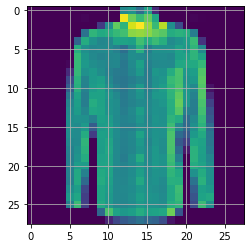

In [0]:
plt.figure()
plt.imshow(train_images[3000])
plt.grid(True)

In [0]:
# dividimos la informacion en nuestros datos de entrenamiento y test
train_images = train_images / 255.0
test_images = test_images /255.0

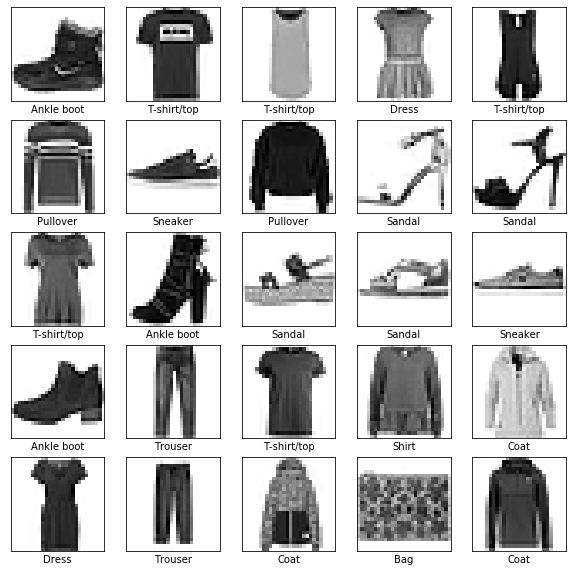

In [0]:
%matplotlib inline
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  #apagamos el grid de datos
  plt.grid('off')
  #mostramos la imagen
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [0]:
#vamos a definir nuestro modelo
#creamos una secuencia que es la division de los elementos
# que nos permite entrenar
# cada una de las secuencias es una de las etapas
# de las capas de nuestra red neuronal y tendremos que obtener unicamente
# lo necesario, son imagenes que hay que dividir donde
# input_shape = (28,28) tamano de nuestras imagenes
# luego asignamos las diferentes etapas de nuestro aprendizaje
# entre ellos la primera es la densidad keras.layers.Dense(128, 
# activation = tf.nn.relu)
# eso es para aprender en cada uno de los pixeles, cada una de
# de las secciones de cada una de estas prendas, teniendo las 
# diferentes relaciones, obteniendo mas alla de los colores, las
# formas que son las que nos interesan, aqui tenemos una funcion 
# de activacion que es relu
# keras.layers.Dense(10, activation = tf.nn.softmax) creamos otra 
# capa de la red para que esta capa se encargue de aprender 
# algo mas, igual con la densidad y ahora con fucnion de activacion
# softmax
model = keras.Sequential([keras.layers.Flatten(input_shape = (28, 28)),
                          keras.layers.Dense(128, activation = tf.nn.relu),
                          keras.layers.Dense(10, activation = tf.nn.softmax)])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
# Compilar el modelo con optimizador que e parte de entrenamiento
# metrica accuracy
model.compile(optimizer = tf.train.AdamOptimizer(),  loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [0]:
# epochs numero de iteraciones para entrenamiento
# conjunto de datos grande, se hace con fragmentos
# por ejemplo para animales base de datos mas grande
# por lo que recomiendan incrementar el epochs
model.fit(train_images, train_labels, epochs = 5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 73us/sample - loss: 0.5019 - acc: 0.8235
Epoch 2/5
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3738 - acc: 0.8648
Epoch 3/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.3372 - acc: 0.8766
Epoch 4/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.3132 - acc: 0.8839
Epoch 5/5
60000/60000 [==============================] - 4s 66us/sample - loss: 0.2957 - acc: 0.8906


In [0]:
# evaluamos la eficiencia del modelo con los datos test
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Accuracy ', test_acc)

10000/10000 [==============================] - 0s 34us/sample - loss: 0.3526 - acc: 0.8747
Accuracy  0.8747


In [0]:
predictions = model.predict(test_images)

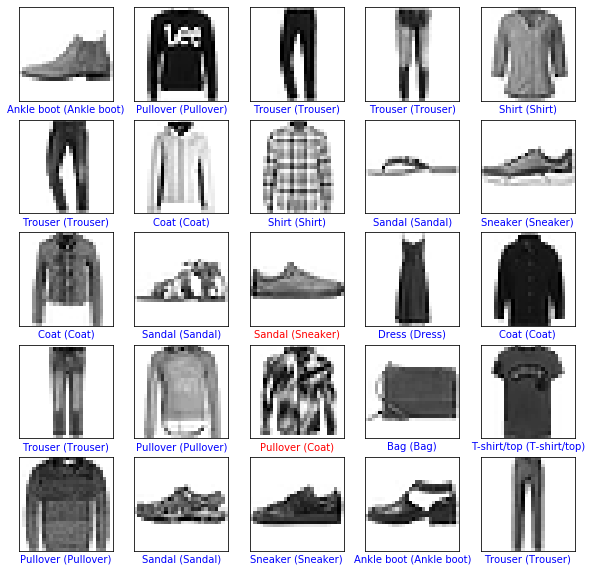

In [0]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel(f'{class_names[predicted_label]} ({class_names[true_label]})', color = color)